In [1]:
pip install pandas matplotlib

Dataset Head:
    total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB

Dataset Info:
 None

Summary Statistics:
        total_bill         tip        size
count  244.000000  244.000000  244.00000

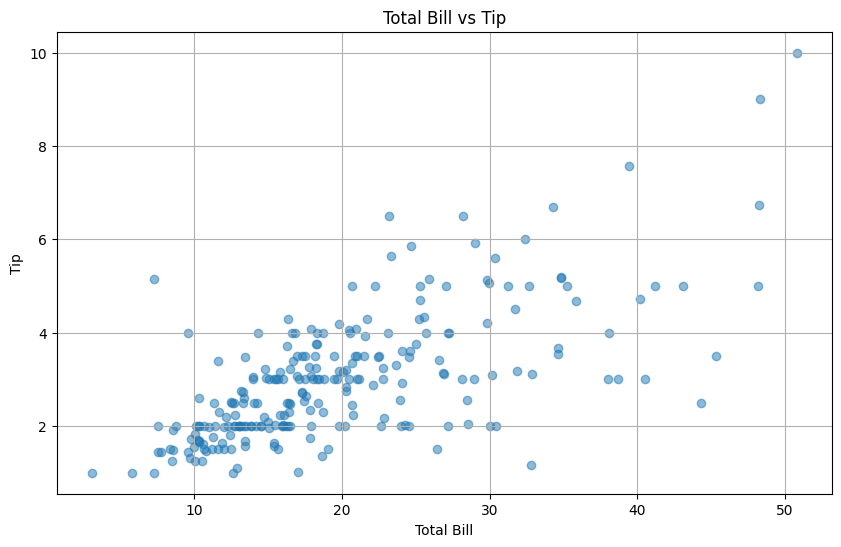

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load a sample dataset
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv'
data = pd.read_csv(url)

# Display basic information about the dataset
print("Dataset Head:\n", data.head())
print("\nDataset Info:\n", data.info())
print("\nSummary Statistics:\n", data.describe())

# Analyze the relationship between total_bill and tip
plt.figure(figsize=(10, 6))
plt.scatter(data['total_bill'], data['tip'], alpha=0.5)
plt.title('Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.grid(True)
plt.savefig('total_bill_vs_tip.png')
plt.show()


In [8]:
import pandas as pd

def load_and_clean_data(url):
    data = pd.read_csv(url)

    # Handle missing values
    data = data.dropna()

    # Convert categorical variables to numeric
    data = pd.get_dummies(data, drop_first=True)

    # Ensure all required dummy variables are present
    required_columns = ['total_bill', 'tip', 'size', 'sex_Male', 'smoker_Yes', 'day_Sat', 'day_Sun', 'day_Thur', 'time_Dinner']
    for col in required_columns:
        if col not in data.columns:
            data[col] = 0  # Add missing column with default value 0

    return data

if __name__ == "__main__":
    url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv'
    clean_data = load_and_clean_data(url)
    clean_data.to_csv('cleaned_tips.csv', index=False)
    print("Data cleaning completed. Cleaned data saved to 'cleaned_tips.csv'.")


Data cleaning completed. Cleaned data saved to 'cleaned_tips.csv'.


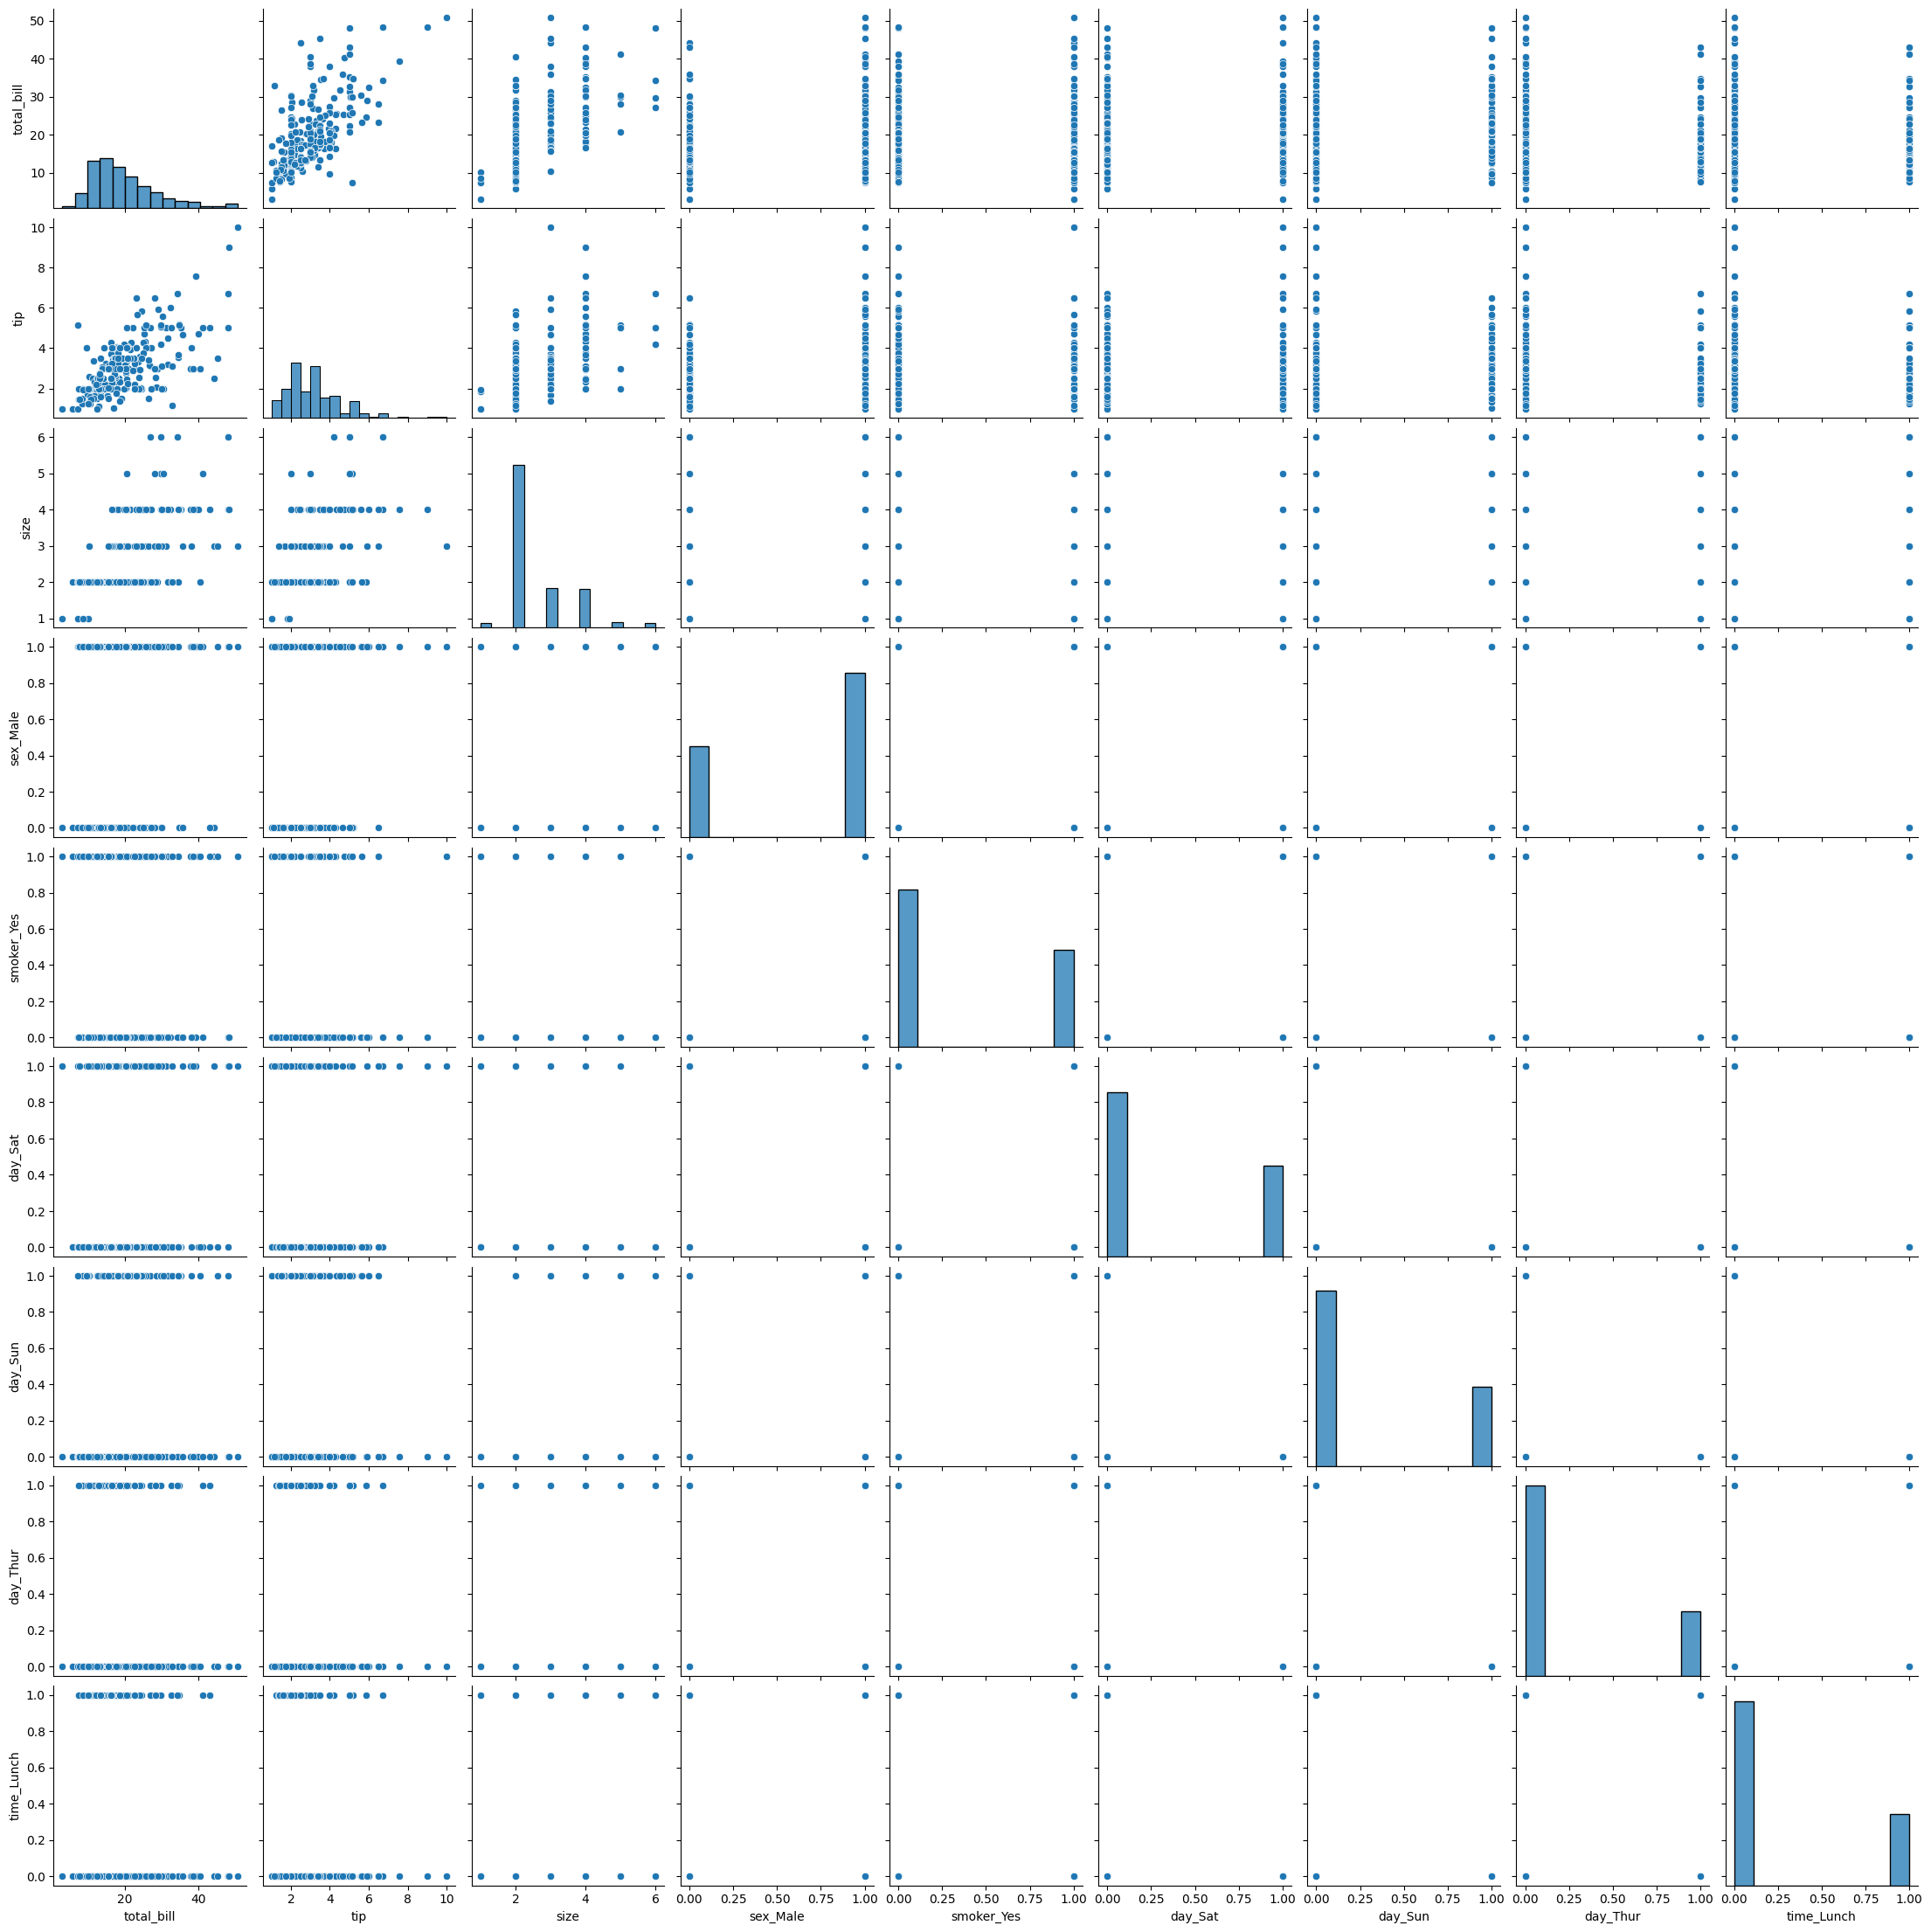

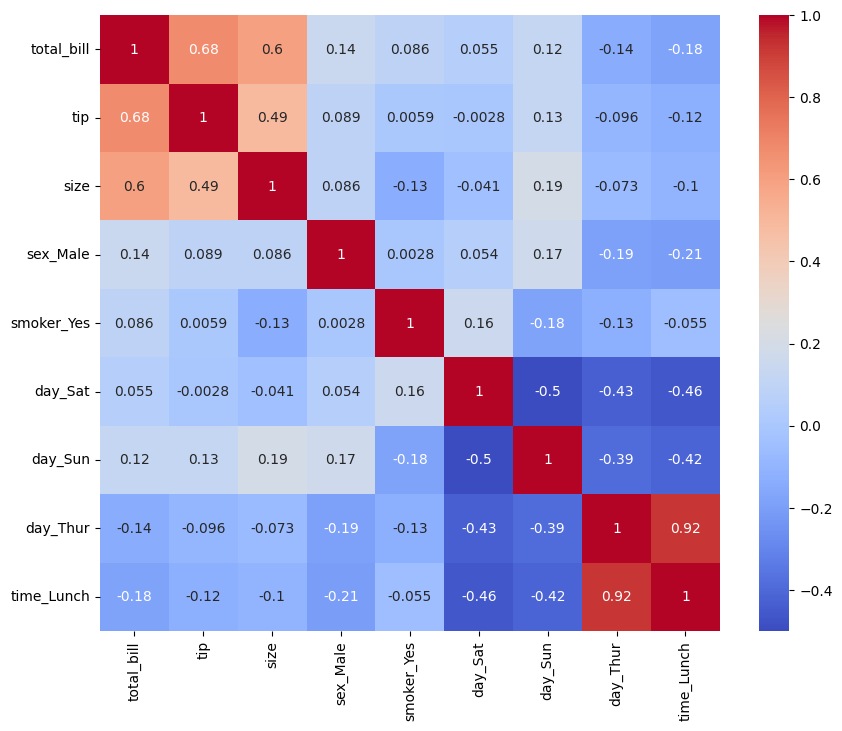

In [4]:
# eda.ipynb

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load cleaned data
data = pd.read_csv('cleaned_tips.csv')

# Pairplot
sns.pairplot(data)
plt.savefig('pairplot.png')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.savefig('correlation_heatmap.png')
plt.show()


In [6]:
# eda.ipynb continued

from scipy.stats import pearsonr

# Correlation and p-value between total_bill and tip
correlation, p_value = pearsonr(data['total_bill'], data['tip'])
print(f'Correlation: {correlation}, P-value: {p_value}')


Correlation: 0.6757341092113647, P-value: 6.69247064686336e-34


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def train_and_evaluate_model(data):
    # Define feature columns
    feature_columns = ['total_bill', 'size', 'sex_Male', 'smoker_Yes', 'day_Sat', 'day_Sun', 'day_Thur', 'time_Dinner']

    # Ensure all feature columns are in the data
    for col in feature_columns:
        if col not in data.columns:
            data[col] = 0

    X = data[feature_columns]
    y = data['tip']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return model, mse, r2

if __name__ == "__main__":
    data = pd.read_csv('cleaned_tips.csv')
    model, mse, r2 = train_and_evaluate_model(data)
    print(f'Model Performance: MSE = {mse}, R2 = {r2}')


Model Performance: MSE = 0.7025125120834769, R2 = 0.43797710664306844
